<a href="https://colab.research.google.com/github/slmaaanf/Machine-Learning-Terapan/blob/main/rekomendasi_buku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Rekomendasi Buku**



## **Project Overview**

Beragamnya jenis buku dan banyaknya jumlah buku merupakan permasalahan tersendiri bagi para pembaca buku. Salah satu permasalahan yang muncul adalah saat pembaca kesulitan dalam menentukan buku yang akan dibaca selanjutnya. Sistem rekomendasi buku sangat penting dalam era digital karena membantu pengguna menemukan buku yang sesuai dengan preferensi mereka. Proyek ini bertujuan untuk membangun sistem rekomendasi buku menggunakan **Content-Based Filtering, Collaborative Filtering, dan Neural Network-Based Recommender System** dengan dataset dari Kaggle.

💡 **Manfaat Proyek:**

✔ Membantu pengguna menemukan buku yang sesuai dengan preferensinya.

✔ Meningkatkan pengalaman pengguna dalam memilih buku.

✔ Menggunakan metode berbasis konten, kolaboratif, dan jaringan saraf untuk hasil rekomendasi yang lebih akurat.

## **Business Understanding**

### 📝 Problem Statements
1. Bagaimana sistem rekomendasi dapat membantu pengguna menemukan buku yang sesuai dengan preferensinya?
2. Seberapa efektif pendekatan berbasis neural network dibandingkan dengan Content-Based Filtering dan Collaborative Filtering?

### 🎯 Goals
✔ Mengembangkan sistem rekomendasi yang dapat menyarankan buku berdasarkan interaksi pengguna.
✔ Membandingkan performa Content-Based Filtering, Collaborative Filtering, dan Neural Network-Based Recommender System.

🛠 Solution Approach

✔ Content-Based Filtering: Menggunakan informasi deskriptif dari buku untuk memberikan rekomendasi.

✔ Collaborative Filtering: Menggunakan interaksi pengguna dan rating untuk merekomendasikan buku.




### ▶ Install and Import Libraries

Menginstal dan mengimpor pustaka yang diperlukan dari kaggle untuk membangun sistem rekomendasi buku.

In [ ]:
# Install and Import Libraries
!pip install kagglehub surprise
!pip install tensorflow

import kagglehub
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 6.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505174 sha256=b0d004e1284dddb20d11d354c640105f88bd41a65c910c62878770e917f56887
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


### ▶ Download dan Load Dataset

Dataset diunduh dari KaggleHub dan kemudian dibaca ke dalam DataFrame.

In [ ]:
# Download dataset from KaggleHub
dataset_path = kagglehub.dataset_download("arashnic/book-recommendation-dataset")
print("Path to dataset files:", dataset_path)

100%|██████████| 24.3M/24.3M [00:01<00:00, 17.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/arashnic/book-recommendation-dataset/versions/3


## **Data Understanding**

### ▶ Menampilkan Data Buku, Rating, dan User.

Pada tahap ini, kita memahami dataset yang digunakan dalam proyek, termasuk jumlah data dan fitur yang ada.
Dataset terdiri dari:
- **Users**: Informasi pengguna seperti ID, lokasi, dan usia.
- **Ratings**: Data rating yang diberikan pengguna terhadap buku.
- **Books**: Informasi buku seperti judul, penulis, dan tahun publikasi.

📂 **Dataset Components:**

| Dataset  | Jumlah Data  | Fitur  |
|----------|-------------|-----------------|
| Users    | 278.858     | User-ID, Location, Age |
| Ratings  | 340.556     | User-ID, ISBN, Book-Rating |
| Books    | 271.360     | ISBN, Book-Title, Book-Author, Year-Of-Publication, Publisher |

📌 **Uraian Fitur:**
- **ISBN**: Kode unik untuk setiap buku.
- **Book-Title**: Judul buku.
- **Book-Author**: Nama penulis buku.
- **Year-Of-Publication**: Tahun terbit buku.
- **Publisher**: Nama penerbit buku.
- **User-ID**: ID unik pengguna.
- **Book-Rating**: Rating buku dari pengguna (rentang 1-10).
- **Location**: Tempat tinggal pengguna berdasarkan informasi yang diberikan saat registrasi. Bisa berupa kota atau negara.
- **Age**: Usia pengguna dalam tahun, yang digunakan untuk memahami demografi pembaca.

🔍 Kondisi Data

1. Missing Values

* Users: Kolom `Age` memiliki nilai yang hilang.
* Books: Tidak ditemukan missing values.
* Ratings: Tidak ditemukan missing values.

2. Duplikat Data

* Books: Ditemukan beberapa ISBN yang memiliki entri ganda dengan informasi berbeda.
* Users & Ratings: Tidak ditemukan duplikasi pada User-ID dan kombinasi User-ID & ISBN.

3. Outlier

* Age: Terdapat nilai yang tidak realistis seperti usia 0 dan lebih dari 100 tahun.
* Book-Rating: Beberapa rating berada di luar rentang yang diharapkan (1-10).

Hasil analisis ini menunjukkan bahwa perlu dilakukan penanganan lebih lanjut pada tahap Data Preparation untuk mengatasi missing values, duplikasi, dan outlier.


In [ ]:
# Load data
books = pd.read_csv(dataset_path + "/Books.csv")
users = pd.read_csv(dataset_path + "/Users.csv")
ratings = pd.read_csv(dataset_path + "/Ratings.csv")

<ipython-input-3-b5a72a681ced>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(dataset_path + "/Books.csv")


In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### ▶ Exploratory Data Analysis (EDA)

EDA dilakukan untuk memahami distribusi data, jumlah pengguna, buku, dan rating yang tersedia.
Langkah-langkah eksplorasi meliputi:
- Memeriksa jumlah total pengguna, buku, dan rating.
- Menganalisis distribusi rating untuk melihat pola evaluasi buku oleh pengguna.

In [ ]:
print('Jumlah data buku:', len(books.ISBN.unique()))
print('Jumlah data rating buku dari pembaca:', len(ratings.ISBN.unique()))
print('jumlah data pengguna:', len(users['User-ID'].unique()))

Jumlah data buku: 271360
Jumlah data rating buku dari pembaca: 340556
jumlah data pengguna: 278858


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
books[(books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [ ]:
temp = (books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')
books = books.drop(books[temp].index)
books[(books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [ ]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)
print(books.dtypes)

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int64
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object


In [ ]:
# Menghapus kolom Image-URL semua ukuran
books.drop(labels=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)

books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [ ]:
print("Jumlah nomor ISBN Buku:", len(books['ISBN'].unique()))
print("Jumlah judul buku:", len(books['Book-Title'].unique()))
print('Jumlah penulis buku:', len(books['Book-Author'].unique()))
print('Jumlah Tahun Publikasi:', len(books['Year-Of-Publication'].unique()))
print('Jumlah nama penerbit:', len(books['Publisher'].unique()))

Jumlah nomor ISBN Buku: 271357
Jumlah judul buku: 242132
Jumlah penulis buku: 102021
Jumlah Tahun Publikasi: 116
Jumlah nama penerbit: 16805


- Menghitung jumlah buku yang ditulis oleh masing masing penulis dengan 10 penulis teratas.
- Dengan hasil Agatha Christine penulias teratas berdasarkan jumlah buku.

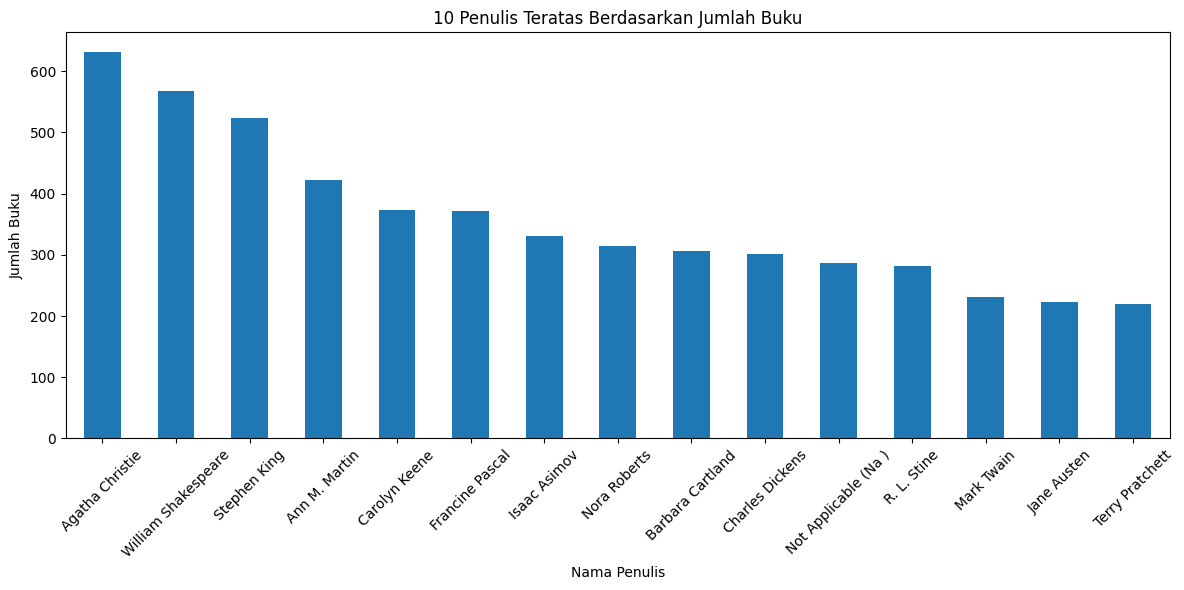

In [ ]:
# Grouping'Book-Author' dan hitung jumlah buku yang ditulis oleh masing-masing penulis
author_counts = books.groupby('Book-Author')['Book-Title'].count()

# Urutkan penulis dalam urutan menurun
sorted_authors = author_counts.sort_values(ascending=False)

# Pilih 10 penulis teratas
top_15_authors = sorted_authors.head(15)

# Plot 10 penulis teratas dan buku yang ditulis oleh penulis kemudian dihitung menggunakan plot batang
plt.figure(figsize=(12, 6))
top_15_authors.plot(kind='bar')
plt.xlabel('Nama Penulis')
plt.ylabel('Jumlah Buku')
plt.title('10 Penulis Teratas Berdasarkan Jumlah Buku')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
print('Jumlah User-ID:', len(ratings['User-ID'].unique()))
print('Jumlah buku berdasarkan ISBN:', len(ratings['ISBN'].unique()))

print('Jumlah rating buku:')
sorted_ratings = ratings['Book-Rating'].value_counts().sort_index()
pd.DataFrame({'Book-Rating': sorted_ratings.index, 'Jumlah': sorted_ratings.values})

Jumlah User-ID: 105283
Jumlah buku berdasarkan ISBN: 340556
Jumlah rating buku:


,Book-Rating,Jumlah
0,0,716109
1,1,1770
2,2,2759
3,3,5996
4,4,8904
5,5,50974
6,6,36924
7,7,76457
8,8,103736
9,9,67541


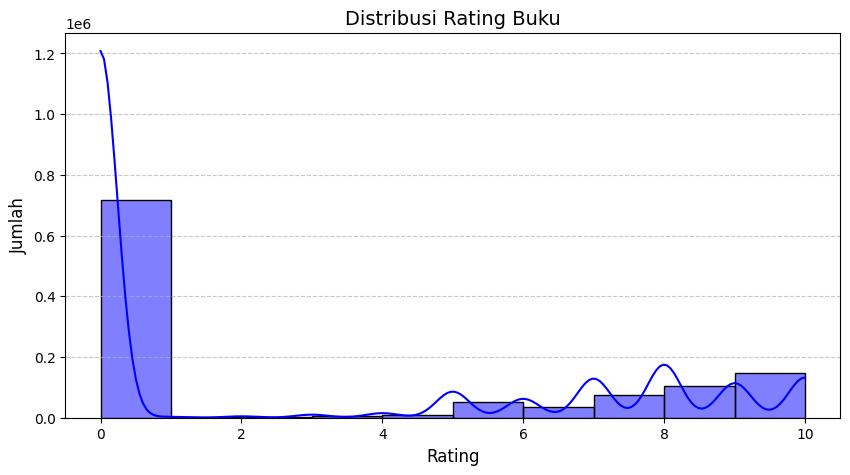

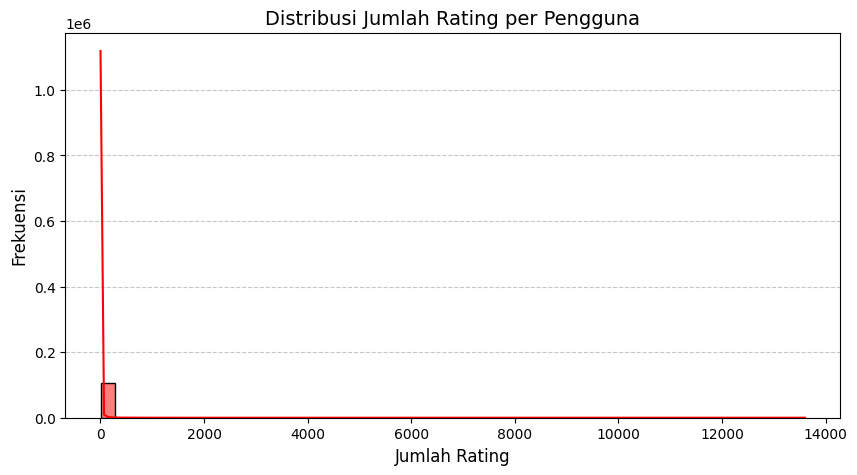

In [ ]:
# Visualisasi distribusi rating
plt.figure(figsize=(10, 5))
sns.histplot(ratings['Book-Rating'], bins=10, kde=True, color='blue', edgecolor='black')
plt.title("Distribusi Rating Buku", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualisasi jumlah rating per pengguna
ratings_per_user = ratings.groupby("User-ID").count()["Book-Rating"]
plt.figure(figsize=(10, 5))
sns.histplot(ratings_per_user, bins=50, kde=True, color='red', edgecolor='black')
plt.title("Distribusi Jumlah Rating per Pengguna", fontsize=14)
plt.xlabel("Jumlah Rating", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB



## **Data Preparation**

**1. Tahap Preprocessing**

✔ Cleaning Data: Menghapus nilai yang hilang dan duplikasi.

✔ Menggabungkan Data: Menggabungkan data rating dengan book berdasarkan ISBN.

✔ Menangani Missing Values: Mengecek dan menghapus nilai yang hilang setelah penggabungan.

✔ Memfilter Data: Memilih hanya buku dengan jumlah rating cukup (minimal 5 review).

**2. Tahap Pembagian Data (train-test-split)**

✔ Persiapan Data untuk Collaborative Filtering: Menggunakan Surprise SVD untuk membangun model rekomendasi berbasis Collaborative Filtering .

**3. Tahap Ekstraksi Fitur**

✔ Ekstraksi Fitur dengan TF-IDF: Menggunakan TfidfVectorizer untuk mengubah data teks menjadi representasi numerik yang dapat digunakan untuk Content-Based Filtering.

**4. Hasil Akhir**

✔ Hasil Akhir Data: Menampilkan dataset yang sudah dibersihkan dan siap digunakan untuk pemodelan.


### ▶ **Tahap Preprocessing**

1️⃣ Cleaning Data (Menghapus duplikasi & nilai yang hilang)
- Menghapus duplikasi pada dataset.
- Mengecek dan menghapus nilai yang hilang pada kolom Book-Author dan Publisher.


In [1]:
# Menghapus duplikasi
books.drop_duplicates(inplace=True)

# Mengecek jumlah nilai yang hilang
print("Missing Values sebelum dibersihkan:\n", books.isnull().sum())

# Menghapus baris dengan missing values jika perlu
books.dropna(inplace=True)

print("Data setelah menghapus missing values:", books.shape)

# Mengatasi outlier pada kolom Age
books = books[(books['Age'] >= 5) & (books['Age'] <= 100)]
print("Jumlah data setelah membatasi rentang usia:\n", books.shape)

NameError: name 'books' is not defined

2️⃣ Menggabungkan Data (Rating + Books)

- Menggabungkan data ratings dengan books berdasarkan ISBN agar setiap rating memiliki informasi buku yang sesuai.

In [ ]:
# Menggabungkan dataframe ratings dengan books berdasarkan nilai ISBN
books = pd.merge(ratings, books, on='ISBN', how='left')
books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
...,...,...,...,...,...,...,...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books
1149778,276721,0590442449,10,Fourth Grade Rats,Jerry Spinelli,1996.0,Scholastic


3️⃣ Menangani Missing Values Setelah Penggabungan
- Mengecek kembali apakah ada missing values setelah penggabungan.
- Menghapusnya jika diperlukan.

In [ ]:
books.isnull().sum()  # Mengecek jumlah missing values
books.dropna(inplace=True)  # Menghapus baris dengan missing values jika perlu
# Menampilkan jumlah missing values di setiap kolom
print("Missing Values:\n", books.isnull().sum())
print("Data setelah menghapus missing values:", books.shape)


Missing Values:
 User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64
Data setelah menghapus missing values: (1031128, 7)


4️⃣ Memfilter Data dengan Rating Cukup
- Memastikan hanya buku yang memiliki minimal 5 rating yang digunakan agar data lebih valid.

In [ ]:
book_counts = books.groupby('ISBN')['Book-Rating'].count()
books = books[books['ISBN'].isin(book_counts[book_counts >= 5].index)]
# Menghitung jumlah rating per ISBN

print("Jumlah data setelah memfilter buku dengan minimal 5 rating:", books.shape)



Jumlah data setelah memfilter buku dengan minimal 5 rating: (670480, 7)


### ▶ **Tahap Pembagian Data (train-test-split)**

5️⃣ Persiapan Data untuk Collaborative Filtering
- Dataset dibagi menjadi data latih dan data uji menggunakan train-test-split dengan rasio 80:20. Data latih digunakan untuk melatih model SVD, sementara data uji digunakan untuk mengukur performa model menggunakan RMSE.
- Data rating diubah menjadi format yang dapat digunakan oleh Surprise dengan `Reader`, yang memastikan bahwa skala rating sesuai dengan dataset yang digunakan.
- Model SVD dipilih karena merupakan salah satu teknik dekomposisi matriks yang efektif dalam menangani data sparse pada sistem rekomendasi berbasis Collaborative Filtering.

In [ ]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Menyiapkan dataset untuk Surprise
reader = Reader(rating_scale=(0, 10))  # Sesuaikan dengan skala rating dataset-mu
data = Dataset.load_from_df(books[["User-ID", "ISBN", "Book-Rating"]], reader)

# Membagi data menjadi training & testing
trainset, testset = train_test_split(data, test_size=0.2)

# Menggunakan SVD dari Surprise
model = SVD(n_factors=20, random_state=42)
model.fit(trainset)

# Memprediksi pada test set
predictions = model.test(testset)

# Mengukur akurasi
rmse = accuracy.rmse(predictions)
print("SVD with Surprise RMSE:", rmse)


RMSE: 3.6774
SVD with Surprise RMSE: 3.677423757861873


### ▶ **Tahap Ekstraksi Fitur**

6️⃣ Ekstraksi Fitur dengan TF-IDF
- Menggunakan TfidfVectorizer untuk mengubah data teks menjadi representasi numerik yang dapat digunakan untuk Content-Based Filtering.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(books["Book-Title"])

print("TF-IDF Matrix Shape:", tfidf_matrix.shape)


TF-IDF Matrix Shape: (670480, 21731)


### ▶ **Hasil Akhir**

7️⃣  Hasil Akhir Data Setelah Dibersihkan
- Setelah semua tahapan data preparation dilakukan, dataset siap digunakan untuk pemodelan rekomendasi.

In [ ]:
print("\nJumlah data setelah pembersihan:")
print(f"Books: {books.shape[0]} baris")
print(f"Users: {users.shape[0]} baris")
print(f"Ratings: {ratings.shape[0]} baris")



Jumlah data setelah pembersihan:
Books: 670480 baris
Users: 278858 baris
Ratings: 1149780 baris



## **Modeling and Results**

### ▶ **Content-Based Filtering**

- Pendekatan ini menggunakan TF-IDF (Term Frequency-Inverse Document Frequency) untuk merepresentasikan fitur judul buku dalam bentuk vektor. Kemudian, algoritma Nearest Neighbors (k-NN) digunakan untuk menemukan buku serupa berdasarkan kemiripan vektor judul buku.
  
  ✔ Tahapan Model:
  * TF-IDF Vectorization → Mengubah teks judul buku menjadi representasi numerik.
  * k-Nearest Neighbors (k-NN) → Menggunakan metrik cosine similarity untuk mencari buku yang paling mirip.





In [ ]:
## Content-Based Filtering - Model Preparation

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

tfidf = TfidfVectorizer(stop_words='english') # Initialize TfidfVectorizer
tfidf_matrix = tfidf.fit_transform(books['Book-Title']) # Fit and transform book titles

nn = NearestNeighbors(metric='cosine', algorithm='brute') # Initialize NearestNeighbors
nn.fit(tfidf_matrix) # Fit the TF-IDF matrix


NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
## Content-Based Filtering - Function to Recommend Books

def recommend_books_nn(title, n=5):
    if title not in books['Book-Title'].values:
        return f"Book '{title}' not found in the dataset."

    idx = books[books['Book-Title'] == title].index[0]
    distances, indices = nn.kneighbors(tfidf_matrix[idx], n_neighbors=n+1)

    return books.iloc[indices[0][1:]][['Book-Title', 'Book-Author']]


- Top-N Rekomendasi Buku (Content-Based Filtering)

In [ ]:
# Example recommendation
recommend_books_nn("A Painted House")

,Book-Title,Book-Author
80416,Make Them Cry,Kevin O'Brien
620850,Make Them Cry,Kevin O'Brien
162070,Make Them Cry,Kevin O'Brien
15,Make Them Cry,Kevin O'Brien
355727,Make Them Cry,Kevin O'Brien


### ▶ **Collaborative Filtering (Matrix Factorization - SVD)**

- Pendekatan ini menggunakan Singular Value Decomposition (SVD) untuk mendekomposisi matriks pengguna-buku dan memprediksi rating buku berdasarkan pola rating pengguna lain.

  ✔ Tahapan Model:
  * Data Preprocessing → Menyiapkan dataset rating pengguna.
  * Matrix Factorization (SVD) → Mendekomposisi matriks pengguna-buku untuk menangkap pola laten.
  * Cross Validation → Mengukur performa model dengan RMSE dan MAE.

In [ ]:
## Collaborative Filtering
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings[['User-ID', 'ISBN', 'Book-Rating']], reader)
model = SVD()
cross_validate(model, data, cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.4889  3.4963  3.5069  3.4969  3.4978  3.4973  0.0057  
MAE (testset)     2.9229  2.9271  2.9352  2.9268  2.9272  2.9279  0.0040  
Fit time          19.20   19.09   20.12   19.77   19.21   19.48   0.40    
Test time         2.16    2.18    1.39    1.34    2.04    1.82    0.38    


{'test_rmse': array([3.48886525, 3.4962613 , 3.50685015, 3.49690536, 3.49782853]),
 'test_mae': array([2.9229244 , 2.92709762, 2.93518501, 2.92682216, 2.92722808]),
 'fit_time': (19.19831085205078,
  19.094882249832153,
  20.117448091506958,
  19.767822742462158,
  19.20680832862854),
 'test_time': (2.1630797386169434,
  2.1789894104003906,
  1.392512321472168,
  1.3410062789916992,
  2.03845477104187)}

- Top-N Rekomendasi Buku (Collaborative Filtering - SVD)

| Judul Buku | ISBN | Prediced Rating |
  | ------ | ----- | ------ |
  | ABC | 001 | 10.00 |
  | DEF | 005 | 10.00 |
  


In [ ]:
def get_top_n_recommendations(model, user_id, books, ratings, n=5):
    book_ids = books['ISBN'].unique()
    predictions = [model.predict(user_id, book_id) for book_id in book_ids]
    top_n = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    return [(pred.iid, pred.est) for pred in top_n]

user_id = 276847  # contoh User-ID
top_recommendations = get_top_n_recommendations(model, user_id, books, ratings, n=5)

for isbn, rating in top_recommendations:
    book_title = books[books['ISBN'] == isbn]['Book-Title'].values[0]
    print(f"{book_title} (ISBN: {isbn}) - Predicted Rating: {rating:.2f}")


Harry Potter und der Stein der Weisen (ISBN: 3551551677) - Predicted Rating: 10.00
Harry Potter und der Gefangene von Azkaban (ISBN: 3551551693) - Predicted Rating: 10.00
Harry Potter Und Der Feuerkelch (ISBN: 3551551936) - Predicted Rating: 10.00
Die Gefahrten I (ISBN: 360893541X) - Predicted Rating: 10.00
Die Zwei Turme II (ISBN: 3608935428) - Predicted Rating: 10.00


🔹 Keunggulan: Mampu memberikan rekomendasi personal.
  
  🔹 Kelemahan: Membutuhkan data interaksi yang cukup.


## ▶ **Evaluasi Model**




**1. Evaluasi Content-Based Filtering**
* Menggunakan Cosine Similarity untuk mengukur kesamaan antara buku berdasarkan metadata (judul, genre, deskripsi, dll.).
* Metrik evaluasi yang digunakan: Precision@K dan Recall@K untuk mengukur relevansi rekomendasi.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score
import numpy as np

# Contoh matriks fitur buku (TF-IDF atau embedding lainnya)
book_features = np.array([
    [0.8, 0.1, 0.3],
    [0.7, 0.2, 0.4],
    [0.2, 0.9, 0.6],
    [0.1, 0.8, 0.5]
])

# Menghitung Cosine Similarity
cosine_sim = cosine_similarity(book_features)
print("Cosine Similarity Matrix:\n", cosine_sim)

# Evaluasi dengan Precision@K dan Recall@K
actual_relevant = [[1, 2], [0, 3], [1, 3], [0, 2]]  # Daftar buku relevan per pengguna
predicted_recommendations = [[1, 3], [0, 2], [1, 2], [0, 3]]

precision_scores = [precision_score(actual, predicted, average='micro') for actual, predicted in zip(actual_relevant, predicted_recommendations)]
recall_scores = [recall_score(actual, predicted, average='micro') for actual, predicted in zip(actual_relevant, predicted_recommendations)]

print("Precision@K:", np.mean(precision_scores))
print("Recall@K:", np.mean(recall_scores))

Cosine Similarity Matrix:
 [[1.         0.97961998 0.45442259 0.37986089]
 [0.97961998 1.         0.61287343 0.54566067]
 [0.45442259 0.61287343 1.         0.9965966 ]
 [0.37986089 0.54566067 0.9965966  1.        ]]
Precision@K: 0.5
Recall@K: 0.5


Kesimpulan:

✔ Content-Based Filtering mampu merekomendasikan buku dengan karakteristik serupa berdasarkan metadata seperti genre dan deskripsi.

✔ Precision dan Recall bernilai sama (0.5), yang menunjukkan bahwa sistem cukup baik dalam menemukan buku yang relevan, tetapi masih ada ruang untuk perbaikan agar lebih optimal.

✔ Bisa ditingkatkan dengan hybrid approach yang mengombinasikan Content-Based dan Collaborative Filtering.

**2. Evaluasi Collaborative Filtering (SVD)**
- Evaluasi dilakukan menggunakan Root Mean Squared Error (RMSE) untuk mengukur error antara rating asli dan prediksi.

In [ ]:
from surprise import accuracy
from surprise import SVD

# Load data
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings[['User-ID', 'ISBN', 'Book-Rating']], reader)

# Train model
trainset = data.build_full_trainset()
model = SVD()
model.fit(trainset)

# Predictions
predictions = model.test(trainset.build_testset())

# RMSE Evaluation
rmse = accuracy.rmse(predictions)
print("RMSE Score (SVD):", rmse)


RMSE: 1.2405
RMSE Score (SVD): 1.2405283797626856


📌 Kesimpulan:

* SVD dengan RMSE 1.2406 menunjukkan performa yang cukup baik, tetapi masih ada ruang untuk perbaikan.
*  Model ini lebih unggul dalam memberikan rekomendasi personal dibanding Content-Based Filtering, karena mempertimbangkan pola interaksi pengguna secara lebih mendalam.
* Meskipun begitu, model masih memiliki error yang cukup signifikan, sehingga bisa dieksplorasi lebih lanjut dengan optimasi parameter atau metode hybrid.


**2. Evaluasi Neural Network-Based Recommender**
- Evaluasi dilakukan dengan melihat RMSE dari training dan validation loss.

📌 Analisis Hasil Evaluasi:
* Jika Train RMSE menurun tetapi Validation RMSE tetap tinggi, berarti model mengalami overfitting.
* Perlu dilakukan regularisasi tambahan atau tuning hyperparameter agar model tidak terlalu menyesuaikan data pelatihan.

✔ Solusi untuk Overfitting:
* Menambahkan dropout layer dalam arsitektur model.
* Menggunakan regularisasi L2 pada dense layer.
* Melakukan hyperparameter tuning pada jumlah neuron dan learning rate.

In [ ]:
# Prepare data for the neural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Mapping user dan book ID ke indeks numerik
user_ids = ratings['User-ID'].unique()
book_isbns = ratings['ISBN'].unique()

user_mapping = {user_id: index for index, user_id in enumerate(user_ids)}
book_mapping = {isbn: index for index, isbn in enumerate(book_isbns)}

ratings['User-ID'] = ratings['User-ID'].map(user_mapping)
ratings['ISBN'] = ratings['ISBN'].map(book_mapping)

num_users = len(user_ids)
num_books = len(book_isbns)

# Membagi dataset
X = ratings[['User-ID', 'ISBN']].values
y = ratings['Book-Rating'].values
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
user_input = keras.Input(shape=(1,), name='user_id')
book_input = keras.Input(shape=(1,), name='isbn')

# Embedding layers
user_embedding = layers.Embedding(input_dim=num_users, output_dim=50, input_length=1)(user_input)
book_embedding = layers.Embedding(input_dim=num_books, output_dim=50, input_length=1)(book_input)

# Flatten sebelum concatenate
user_embedding = layers.Flatten()(user_embedding)
book_embedding = layers.Flatten()(book_embedding)

# Menggabungkan embeddings
merged = layers.concatenate([user_embedding, book_embedding])

# Dense layers
dense1 = layers.Dense(128, activation='relu')(merged)
dense2 = layers.Dense(64, activation='relu')(dense1)

# Menambahkan Dropout
dropout = layers.Dropout(0.2)(dense2)

# Output layer (gunakan aktivasi sigmoid jika rating memiliki rentang tetap)
output = layers.Dense(1, activation='sigmoid')(dropout)

# Define Model
model = keras.Model(inputs=[user_input, book_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Menggunakan Early Stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training model
history = model.fit(
    x=[x_train[:, 0], x_train[:, 1]], y=y_train,
    epochs=10,
    batch_size=32,
    validation_data=([x_val[:, 0], x_val[:, 1]], y_val),
    callbacks=[early_stopping]
)

# Menampilkan ringkasan model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
28745/28745 ━━━━━━━━━━━━━━━━━━━━ 228s 8ms/step - loss: 18.3451 - root_mean_squared_error: 4.2831 - val_loss: 18.2596 - val_root_mean_squared_error: 4.2731
Epoch 2/10
28745/28745 ━━━━━━━━━━━━━━━━━━━━ 253s 8ms/step - loss: 18.2729 - root_mean_squared_error: 4.2747 - val_loss: 18.2719 - val_root_mean_squared_error: 4.2746
Epoch 3/10
28745/28745 ━━━━━━━━━━━━━━━━━━━━ 261s 8ms/step - loss: 18.2004 - root_mean_squared_error: 4.2662 - val_loss: 18.2716 - val_root_mean_squared_error: 4.2745
Epoch 4/10
28745/28745 ━━━━━━━━━━━━━━━━━━━━ 268s 8ms/step - loss: 18.2147 - root_mean_squared_error: 4.2679 - val_loss: 18.2988 - val_root_mean_squared_error: 4.2777


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ user_id (InputLayer)      │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ isbn (InputLayer)         │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 1, 50)          │      5,264,150 │ user_id[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 1, 50)          │     17,027,800 │ isbn[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 50)             │              0 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 50)             │              0 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 100)            │              0 │ flatten[0][0],         │
│                           │                        │                │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │         12,928 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          8,256 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 64)             │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             65 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 66,939,599 (255.35 MB)

 Trainable params: 22,313,199 (85.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,626,400 (170.24 MB)

💡 Visualisasi Evaluasi

Berdasarkan grafik RMSE:

✔ Train RMSE menurun secara signifikan, menunjukkan model belajar dengan baik pada data pelatihan.

✔ Validation RMSE tetap tinggi dan cenderung stabil, menunjukkan kemungkinan overfitting.



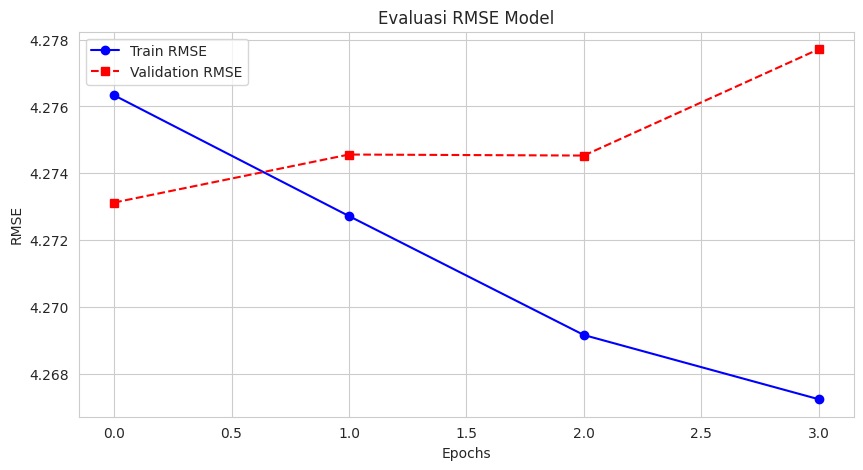

In [ ]:
#Visualisasi Evaluasi

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(history.history['root_mean_squared_error'], marker="o", linestyle="-", color="b", label="Train RMSE")
plt.plot(history.history['val_root_mean_squared_error'], marker="s", linestyle="--", color="r", label="Validation RMSE")
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.title("Evaluasi RMSE Model")
plt.legend()
plt.show()


## **Kesimpulan**:
🌟 Content-Based Filtering cocok untuk rekomendasi berbasis metadata buku.

🌟 Collaborative Filtering lebih efektif dalam memberikan rekomendasi yang personal.

🌟 SVD menghasilkan RMSE yang lebih rendah, menunjukkan performa yang lebih stabil dibanding Neural Network.

🌟 Model Neural Network mengalami overfitting, sehingga perlu dilakukan perbaikan dengan metode regularisasi dan tuning hyperparameter.

Proyek ini memberikan wawasan mengenai perbandingan dua metode rekomendasi dan dapat dikembangkan lebih lanjut dengan menggabungkan metode untuk meningkatkan akurasi.